In [1]:
try:
    # Colab only
    %tensorflow_version 2.x
except Exception:
    pass

#import necessary libraries.
import tensorflow as tf
import numpy as np
layer = tf.keras.layers

print('check tensorflow version : ', tf.__version__)

TensorFlow 2.x selected.
check tensorflow version :  2.0.0-rc2


# tf.data API

tf.data API는 데이터셋을 모델에 연결해주기 위한 복합적인 입력 파이프라인을 구축할 수 있게 도와줍니다.

다수의 분산된 파일로부터 통합된 데이터를 만들어야 하는 경우나, 데이터 전처리, 미니배치, 랜덤셔플링 등의 데이터 파이프라인을 위한 복잡한 구조를 높은 추상성으로 간단하게 제어할 수 있는 인터페이스를 제공합니다.

https://www.tensorflow.org/guide/data

### 1. from_tensor_slices : python으로부터 데이터 받기

In [122]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
#tf.random.uniform 은 랜덤하게 계속 값을 바꿔준다 4*10 크기의 매트릭스 작성
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [123]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [124]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [125]:
for i in dataset3.take(2):
    print(i)
#     print(i[0])
#     print('\n-------------------------------------------------------------------\n')
#     print(i[1])

(<tf.Tensor: id=82868, shape=(10,), dtype=float32, numpy=
array([0.7302425 , 0.8774078 , 0.2012831 , 0.8283515 , 0.8817512 ,
       0.34979236, 0.59300554, 0.9763757 , 0.9535173 , 0.7186383 ],
      dtype=float32)>, (<tf.Tensor: id=82869, shape=(), dtype=float32, numpy=0.1366874>, <tf.Tensor: id=82870, shape=(100,), dtype=int32, numpy=
array([19, 24, 72,  6, 25, 46, 37,  8,  4, 10, 64, 69, 94, 99, 81, 99, 90,
       84,  0, 83, 78,  0,  2, 90, 38, 61, 57, 42, 68, 83, 79, 62, 80, 33,
        0, 43, 67, 54, 11, 83, 21, 63, 10, 82, 82, 48, 51,  8, 23, 81, 64,
       90, 34, 16, 86, 54, 82, 46, 12, 30, 54, 98, 25, 64, 45, 15, 77, 66,
       49, 56, 83, 63, 29, 38, 28,  9, 22, 92, 74, 25, 30, 54, 27,  7, 86,
       87, 11, 79, 39, 65,  6, 81, 42, 54, 79, 39, 78, 63, 85, 16],
      dtype=int32)>))
(<tf.Tensor: id=82871, shape=(10,), dtype=float32, numpy=
array([0.4468323 , 0.25774336, 0.20163035, 0.78347933, 0.39382374,
       0.1381743 , 0.40146792, 0.45226252, 0.49606872, 0.16396439],
    

메모리 공간 위 이미지를 가져오는 경우

In [0]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

(10000, 28, 28) (10000,)
(60000, 28, 28)


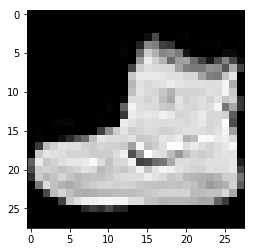

In [153]:
print(test[0].shape,test[1].shape)
images[0]
print(images.shape)
from matplotlib import pyplot as plt
plt.imshow(images[0],cmap='gray')

In [127]:
images, labels = train
#images, labels = train[0],train[1]
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

### 2. TextLineDataset : text file로부터 데이터셋 생성

In [0]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
    tf.keras.utils.get_file(file_name, directory_url+file_name)
    for file_name in file_names ]

In [129]:
print(file_paths)

['/root/.keras/datasets/cowper.txt', '/root/.keras/datasets/derby.txt', '/root/.keras/datasets/butler.txt']


In [0]:
dataset = tf.data.TextLineDataset(file_paths)

In [131]:
for line in dataset.take(1):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"


In [0]:
new_dataset = dataset.shuffle(buffer_size=10000).batch(3)

In [133]:
for line in new_dataset.take(1):
    print(line.numpy())

[b'That draw \xc3\x86neas, urge them from the powers'
 b'Terrified at the stroke, the wounded Chief'
 b"That seem'd a tower, and at Ulysses' side"]


### 3. TextLineDataset : csv 파일로부터 읽어오기

In [134]:
import pandas as pd
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
df = pd.read_csv(titanic_file, index_col=None)
df.head()

32768/30874 [===============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [135]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))

for feature_batch in titanic_slices.take(1):
    for key, value in feature_batch.items():
        print("  {!r:20s}: {}".format(key, value))

  'survived'          : 0
  'sex'               : b'male'
  'age'               : 22.0
  'n_siblings_spouses': 1
  'parch'             : 0
  'fare'              : 7.25
  'class'             : b'Third'
  'deck'              : b'unknown'
  'embark_town'       : b'Southampton'
  'alone'             : b'n'


# keras model build

keras에서 모델을 만들기 위해 알아야 할 3가지 자료형인 layer, tensor, model이 있다.
layer는 인공신경망을 구성하는 하위 계층을 의미하고, tensor는 layer와 layer 사이의 입력과 출력을 말한다. TensorFlow는 flow graph의 형태이기 때문에 tensor는 데이터에 따라 계속 변하는 변동 변수이기 때문에 특정 값을 가진다고 할 수 없음. 그러나 tf 2.0부터 tensor의 값을 tensor.numpy()의 형태로 쉽게 확인할 수 있음. 마지막으로 model은 layer를 엮은 네트워크 객체라고 할 수 있다. 

In [0]:
#layer는 tf.keras.layers 아래의 클래스로 만들 수 있다.
d1 = tf.keras.layers.Dense(32, activation='relu')

In [137]:
print(type(d1)) #레이어의 타입을 볼 수 있다.

<class 'tensorflow.python.keras.layers.core.Dense'>


In [138]:
# 각 layer 클래스는 method로 init, build, call를 갖는다. 
# init은 객체가 만들어지는 단계이고, tf.keras.layers.Dense(32, activation='relu')를 선언했을 때 실행된다.
# build는 실제로 layer가 파라미터를 갖는 단계, call은 layer가 가진 parameter로 데이터를 계산하는 단계이다.

print(d1.get_weights()) #weight는 build되지 않았기 때문에 없음.

[]


In [139]:
# build는 layer가 첫 번째로 call됐을 때 파라미터를 생성함. 특정 데이터를 입력하기 애매하기 때문에 보통 tf.keras.Input을 사용함.
inputs = tf.keras.Input(shape=(784)) #shape를 정해줌. 
#layer의 input shape이 정해져야 layer가 build 단계에서 파라미터의 shape을 결정할 수 있음.
print('type of inputs', type(inputs))
d1_output = d1(inputs)
print('weights of d1', d1.get_weights(), 
      '\n-------------------------------------------------\n',
      'weight shape : ', d1.get_weights()[0].shape,
      '\n-------------------------------------------------\n',
      'bias shape : ', d1.get_weights()[1].shape)

type of inputs <class 'tensorflow.python.framework.ops.Tensor'>
weights of d1 [array([[-0.04300751,  0.05442222, -0.06351914, ..., -0.02036378,
        -0.05058224, -0.04598121],
       [ 0.04205451,  0.01317964, -0.05481307, ...,  0.06202085,
        -0.05788997,  0.03169934],
       [ 0.00340967,  0.02817924, -0.06222881, ..., -0.02501181,
        -0.06403959,  0.03601902],
       ...,
       [ 0.04079453,  0.07551283,  0.01522338, ..., -0.05446227,
        -0.03851385,  0.05197797],
       [-0.05028106,  0.04152895,  0.01364347, ..., -0.00920295,
        -0.06866248, -0.02511162],
       [ 0.07821571, -0.06525655,  0.08213391, ..., -0.06719542,
         0.03864294,  0.01603279]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)] 
-------------------------------------------------
 weight shape :  (784, 32) 
------------------------------------------------

In [140]:
# build가 된 layer는 이제 입력으로 데이터를 받으면 output을 계산한다.
d1_output = d1(np.ones([1,784], dtype=np.float32))
print('d1_output의 타입', type(d1_output)) # 계산 결과의 자료형은 tensor
print('\n-------------------------------------------------\n')
print(d1_output.numpy()) #tf 2.0은 eager excution을 default로 제공하여 현재 tensor가 가지고 있는 값을 확인할 수 있음.

d1_output의 타입 <class 'tensorflow.python.framework.ops.EagerTensor'>

-------------------------------------------------

[[0.         0.         0.         0.47436    0.         1.9658246
  0.         0.3577869  0.         0.         4.2919083  0.
  0.         0.         0.         0.         0.         0.69398415
  2.7948136  0.6680365  1.4964756  0.         0.         0.
  0.         0.         0.8824892  0.         0.5894671  1.7771622
  0.         0.6382079 ]]


In [0]:
#model은 다음과 같이 첫 번째 layer의 input tensor와 마지막 layer의 output tensor를 입력 받아 생성한다.

inputs = tf.keras.Input(shape=(64), name='data_input')
d_1 = tf.keras.layers.Dense(32, activation='relu')
d_1_output = d_1(inputs)
# d_1 = tf.keras.layers.Dense(32, activation='relu')(inputs)와 같이 init 후 inputs를 넣어서 build를 동시에 수행할 수 있음.
d_2_output = tf.keras.layers.Dense(64, activation='relu')(d_1_output)

model = tf.keras.Model(inputs=inputs, outputs=d_2_output)

In [142]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_input (InputLayer)      [(None, 64)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
Total params: 4,192
Trainable params: 4,192
Non-trainable params: 0
_________________________________________________________________


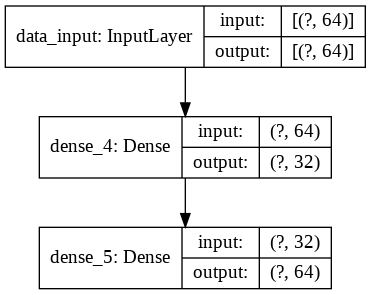

In [143]:
#make sure you have already graphviz, pydot, pydotplus libraries.
tf.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

In [0]:
## 1. Sequential model

### data pipeline creation

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [146]:
print("The shape of train dataset : ", x_train.shape)
print("The shape of test dataset : ", x_test.shape)

The shape of train dataset :  (60000, 28, 28)
The shape of test dataset :  (10000, 28, 28)


In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [148]:
print("The shape of train dataset : ", x_train.shape)
print("The shape of test dataset : ", x_test.shape)

The shape of train dataset :  (60000, 28, 28, 1)
The shape of test dataset :  (10000, 28, 28, 1)


In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32).repeat()

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [151]:
# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

# Trains for 5 epochs.
import math
steps_per_epoch=math.ceil(60000/32)
model.fit(train_ds, epochs=5, steps_per_epoch=steps_per_epoch)
# Don't forget to specify `steps_per_epoch` when calling `fit` on a dataset.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - sparse_categorical_accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1266 - sparse_categorical_accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9714
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9765
Epoch 5

In [94]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 3ms/step - loss: 0.0832 - sparse_categorical_accuracy: 0.9744


[0.08317860521294958, 0.9744]

In [0]:
del model
tf.keras.backend.clear_session()

## 2. Functional API

In [0]:
inputs = tf.keras.Input(shape=(28,28,1))  # Returns a placeholder tensor
x = tf.keras.layers.Flatten()(inputs)
# A layer instance is callable on a tensor, and returns a tensor.
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
predictions = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=predictions)

In [97]:
next(iter(train_ds))[1]

<tf.Tensor: id=30822, shape=(32,), dtype=uint8, numpy=
array([9, 5, 9, 1, 1, 3, 1, 0, 5, 3, 4, 9, 7, 5, 5, 7, 3, 6, 4, 7, 0, 7,
       0, 4, 2, 7, 8, 1, 3, 2, 1, 5], dtype=uint8)>

In [121]:
train_ds

<RepeatDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float64, tf.uint8)>

In [98]:
# The compile step specifies the training configuration.
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

# Trains for 5 epochs.
import math
steps_per_epoch=math.ceil(60000/32)
model.fit(train_ds, epochs=5, steps_per_epoch=steps_per_epoch)
# Don't forget to specify `steps_per_epoch` when calling `fit` on a dataset.

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1221 - sparse_categorical_accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0894 - sparse_categorical_accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0704 - sparse_categorical_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0559 - sparse_categorical_accuracy: 0.9822


In [99]:
model.evaluate(test_ds)

313/313 [==============================] - 1s 3ms/step - loss: 0.0921 - sparse_categorical_accuracy: 0.9731


[0.09213436866539791, 0.9731]

In [0]:
del model
tf.keras.backend.clear_session()

# Split pre-trained model for customized transfer learning

In [101]:
# You can take famous image processing architecture, resnet101.


#https://keras.io/applications/#usage-examples-for-image-classification-models

'''
include_top: whether to include the fully-connected layer at the top of the network.
weights: one of None (random initialization) or 'imagenet' (pre-training on ImageNet).
input_tensor: optional Keras tensor (i.e. output of layers.Input()) to use as image input for the model.
input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (299, 299, 3). It should have exactly 3 inputs channels, and width and height should be no smaller than 71. E.g. (150, 150, 3) would be one valid value.
pooling: Optional pooling mode for feature extraction when include_top is False.
None means that the output of the model will be the 4D tensor output of the last convolutional layer.
'avg' means that global average pooling will be applied to the output of the last convolutional layer, and thus the output of the model will be a 2D tensor.
'max' means that global max pooling will be applied.
classes: optional number of classes to classify images into, only to be specified if include_top is  True, and if no weights argument is specified.
'''


inputs = tf.keras.Input(shape=(240, 240, 3))
resnet101 = tf.keras.applications.ResNet101(include_top=False, weights='imagenet', input_tensor=inputs)
#imagenet 에서 학습한 모델 가져오기
#output 은 클래스의 갯수에 따라 달라지므로
#inputtensor = 이미지의 shape 를 넣어주는 변수 즉 내가 정할 수 있음. 내 영상사이즈를 넣어주는것

171450368/171446536 [==============================] - 6s 0us/step


In [102]:
for l in resnet101.layers[:10]:
  print(l)

In [111]:
#plot the architecture of resnet 101
tf.keras.utils.plot_model(resnet101, 'resnet101.png', show_shapes=True)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
model_input = resnet101.get_layer('input_1').input

In [0]:
model_output = resnet101.get_layer('conv4_block23_out').output

In [0]:
new_model = tf.keras.Model(inputs=model_input, outputs=model_output)

In [110]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 240, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 246, 246, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 120, 120, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 120, 120, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [105]:
len(resnet101.layers)

345

In [116]:
input = tf.keras.Input(shape=[240,240,3])
feature_map = new_model(input)
vector = tf.keras.layers.Flatten()(feature_map)
x= tf.keras.layers.Dense(1024,activation='relu')(vector)
x = tf.keras.layers.Dense(1024,activation='relu')(x)

output = tf.keras.layers.Dense(10,activation = 'softmax')(x)

new_model2 = tf.keras.Model(input = input,output =output)

TypeError: ignored

In [117]:
pred = resnet101.predict(np.ones([1,240,240,3]))
np.argmax(pred)

30436